# Non-linear Interpretability

The key to interpretable machine learning

1. explanation should be interpretable
2. number of explanations should be low (low entropy on possible explanations)

Assume $D = \{(x_i, y_i)\}_{i=1}^{|D|}$, then we have the following optimization function (denote $z$ as explanation)

$cost(D) = \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)$

where $x$ is the input, $y$ is the output, $L$ is the data loss function, and $\mathcal{H}(z)$ is entropy and $\alpha>0$ is tradeoff parameter

Based on this design guideline, we propose the following generalized linear interpretable model:

![model_pipeline](presentations/unifiying_view_credibility.png )

The model has two components, the switch network (parametrized by $\theta_s$ and output explanation probability $p(z|x)$) and the weight network (parametrized by $\theta_w$ and output parameters of an interpretable model f). 

Assuming the switch network and the function network are differentiable, we can derive the update gradient for $\theta_s$ and $\theta_w$.

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_s} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x,y) p(z|x) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \sum_{z} L(x, y, z) \frac{ \partial p(z|x)}{\partial \theta_s} + \alpha  \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} + \alpha \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \frac{\partial \sum_{z} p(z) \log p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) \frac{\partial p(z)}{\partial \theta_s} + p(z) \frac{\partial \log p(z)}{\partial \theta_s}) \\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y,z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y)p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \sum_{x,y} p(x,y) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{x,y} p(x,y) \sum_{z} (\log p(z) + 1) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \mathbb{E}_{x,y} \mathbb{E}_{z|x} (\log p(z) + 1) \frac{\partial \log p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y}\mathbb{E}_{z|x} (L(x, y, z) - \alpha \log p(z) - \alpha) \frac{\partial \log p(z|x)}{\partial \theta_s}
\end{align}

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_w} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_w}\\
&= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z)}{\partial \theta_w}\\
&= \mathbb{E}_{x,y,z} \frac{\partial L(x, y, z)}{\partial \theta_w}
\end{align}

## design choices

For simplicty, we only consider a line as the output of the weight network. We could try other atomic structures such as  circle 

We consider 3 variant  of the switch network (assuming $z \in \mathbb{R}^K$)

1. the last layer of the switch network is a softmax ($z$ being a one hot vector)
2. the last layer of the switch network is multiple sigmoid functions ($p(z|x) = \Pi_{k=1}^K p(z_k|x)$)
3. the switch network is implemented by an rnn ($p(z|x) = \Pi_{k=1}^K p(z_k|x,z_{1:k-1})$)

Obviously, variant 3 is the most general because it computes the full probability while variant 2 assumes digits of z  are independently generated given the input. Variant 1 is also general but it can only hold $K$ explanations, whereas the other two can hold $2^K$ number of explanations so that they are more memory efficient.

We consider the following environment to run our experiment

- Triangle world (to test a world where only 3 line suffices)
- Egg world (to test a world where potentially infinite lines are needed)
- Island in the sea (to fail input gradient)
- Big and small islands (to fail counterfactual explanation)
- Randomly many islands (to get intuition on the model)


## interesting observations

The current model has the following properties

1. low number of explanations
2. $f_i$ are interpretable for $i\in\{0 \cdots K\}$ 

Though this looks good, it does not give the intended effect. Why is that?

Define $X_{f_i} := \{x \in \mathcal{X}: arg\max_i p(z_i|x)\}$ partitions input space $\mathcal{X}$

The problem is $y_{f_i}$ may only contain one class so that it is trivial for $\theta_w$ (have arbitrarily non interpretable model to classify) to correctly label data.

Another issue is the cluster (switch) assignment may not be local in the original input space. We cannot force $X_{f_i}$ to be continuous. The only hope for continuous input space is for the switch network to be simple.

We can solve problem 1 by adding $-\beta H(y|z)$ to the cost function. For problem 2, we need to think carefully (assign points to the nearest classifier does not work: try the triangle environment)


\begin{align}
    -\frac{\partial H(y|z)}{\partial \theta_s} &= \frac{\partial \mathbb{E}_z \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{z} \sum_{x} p(z|x) p(x) \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \frac{\partial \mathbb{E}_{x} \sum_{z} p(z|x) \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x} \sum_{z} \sum_{y} p(y|z) \log p(y|z) \frac{\partial  p(z|x) }{\partial \theta_s}\\
    &= \mathbb{E}_{x} \mathbb{E}_{z|x} \sum_{y} p(y|z) \log p(y|z) \frac{\partial  \log p(z|x) }{\partial \theta_s}
\end{align}

\begin{align}
    -\frac{\partial H(y|z)}{\partial \theta_w} = 0
\end{align}



In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns
from lib.train import InterpretableTrainer
from torch.utils.data import Dataset, DataLoader, TensorDataset
from lib.model import Switch, Weight, apply_linear
from lib.utility import logit_elementwise_loss
from lib.utility import plotDecisionSurface, to_var, to_np, check_nan

## triangle world

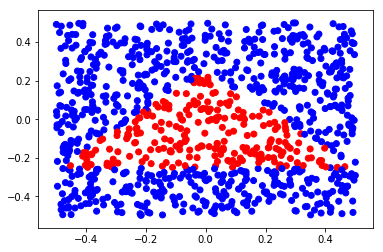

In [2]:
def build_triangle(n=10):  
    X = np.random.rand(n, 2)-0.5
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[1,1,-0.25], [-1, 1, -0.25], [0, -1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_triangle(n)
plotData(X, Y)

0.10% (0m 0s) 0.0007


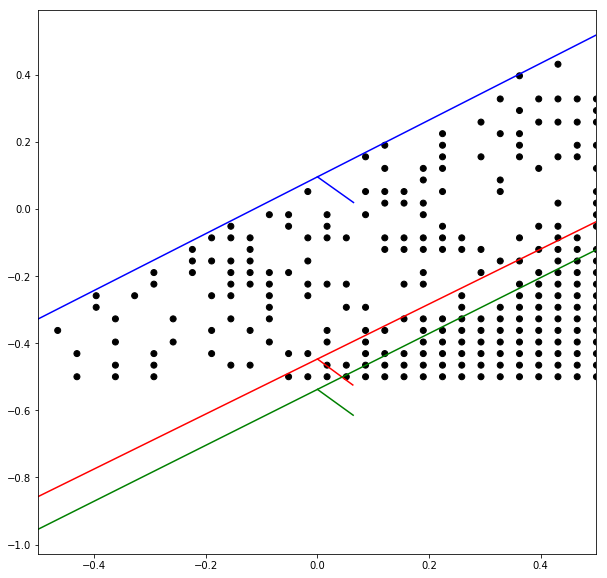

probability of choosing r is 0.0
probability of choosing g is 1.0
probability of choosing b is 0.0
p(y=-1|z="r") is 0.7837837934494019
p(y=-1|z="g") is 0.7479674816131592
p(y=-1|z="b") is 0.7661290168762207


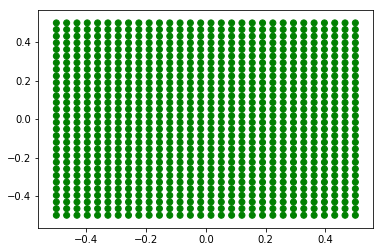

10.10% (0m 12s) 0.0005


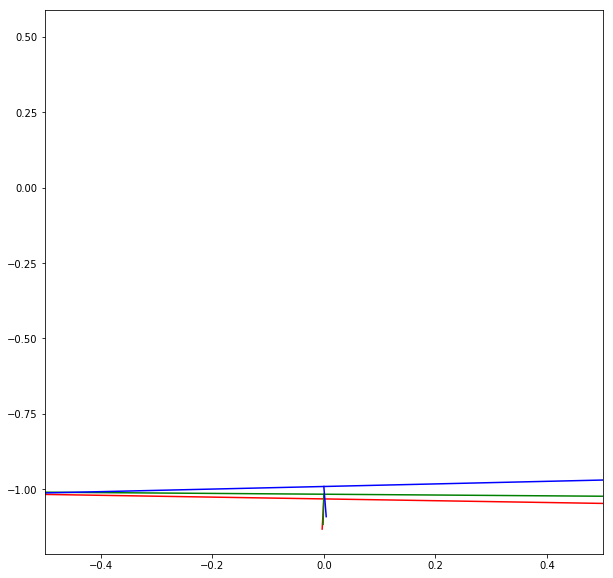

probability of choosing r is 0.442
probability of choosing g is 0.19
probability of choosing b is 0.368
p(y=-1|z="r") is 0.7697160840034485
p(y=-1|z="g") is 0.7650602459907532
p(y=-1|z="b") is 0.7578347325325012


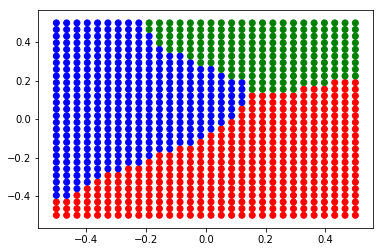

20.10% (0m 23s) 0.0005


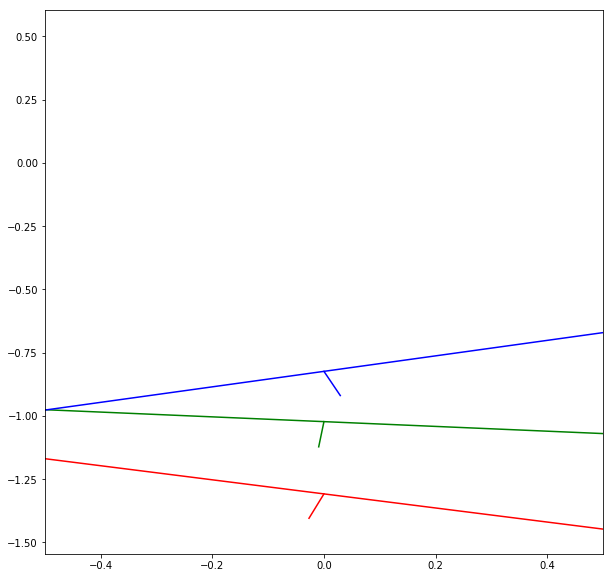

probability of choosing r is 0.464
probability of choosing g is 0.195
probability of choosing b is 0.341
p(y=-1|z="r") is 0.7590027451515198
p(y=-1|z="g") is 0.779104471206665
p(y=-1|z="b") is 0.7532894611358643


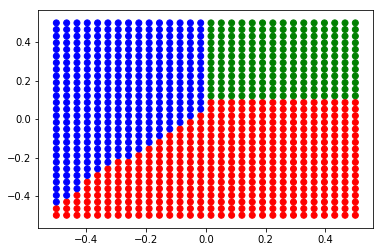

30.10% (0m 35s) 0.0003


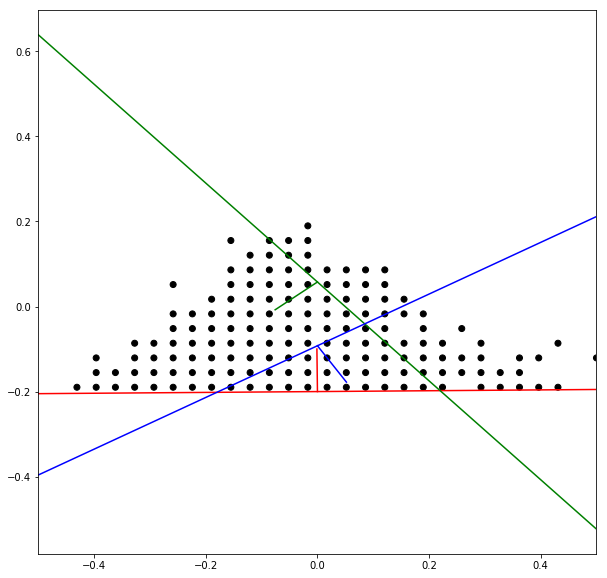

probability of choosing r is 0.491
probability of choosing g is 0.266
probability of choosing b is 0.243
p(y=-1|z="r") is 0.5791583061218262
p(y=-1|z="g") is 0.9186046719551086
p(y=-1|z="b") is 0.9794238805770874


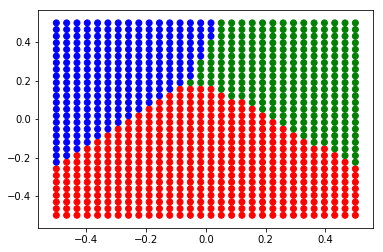

40.10% (0m 45s) 0.0001


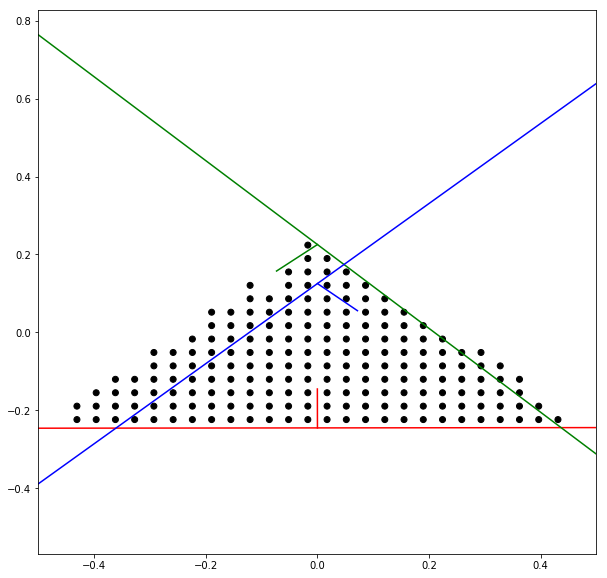

probability of choosing r is 0.485
probability of choosing g is 0.263
probability of choosing b is 0.252
p(y=-1|z="r") is 0.5587629079818726
p(y=-1|z="g") is 0.9315589070320129
p(y=-1|z="b") is 0.9841269850730896


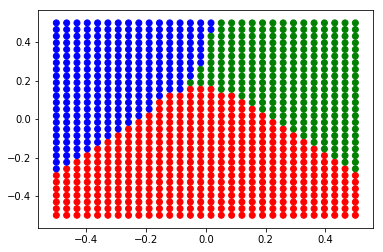

50.10% (0m 56s) 0.0001


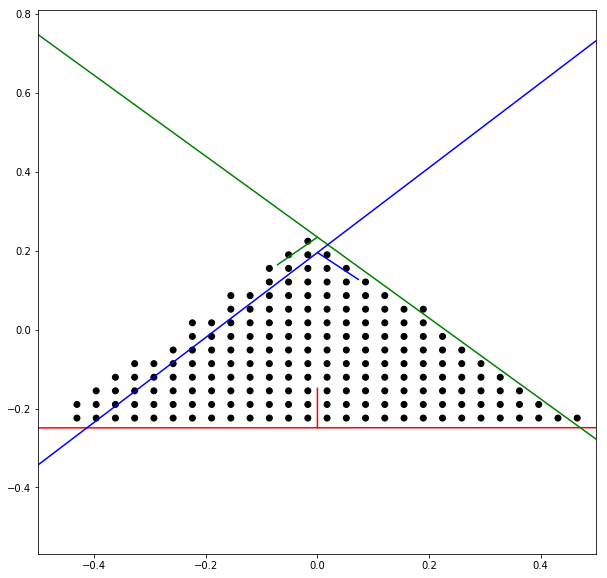

probability of choosing r is 0.49
probability of choosing g is 0.26
probability of choosing b is 0.25
p(y=-1|z="r") is 0.5587629079818726
p(y=-1|z="g") is 0.9318181872367859
p(y=-1|z="b") is 0.9840637445449829


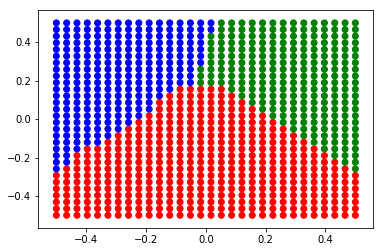

60.10% (1m 6s) 0.0000


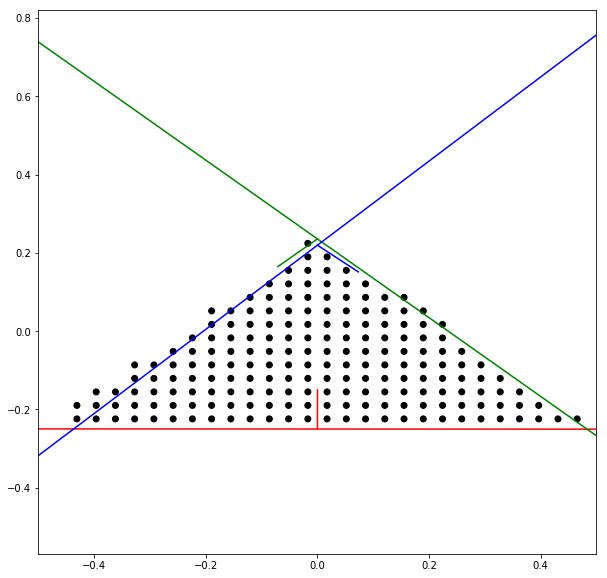

probability of choosing r is 0.492
probability of choosing g is 0.258
probability of choosing b is 0.25
p(y=-1|z="r") is 0.5487805008888245
p(y=-1|z="g") is 0.9647058844566345
p(y=-1|z="b") is 0.9802371263504028


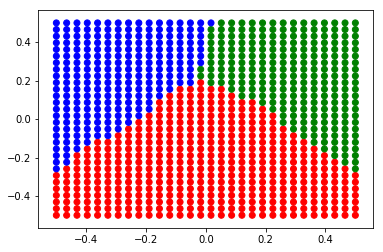

inf gradient switchNet
inf gradient switchNet
70.10% (1m 16s) 0.0000


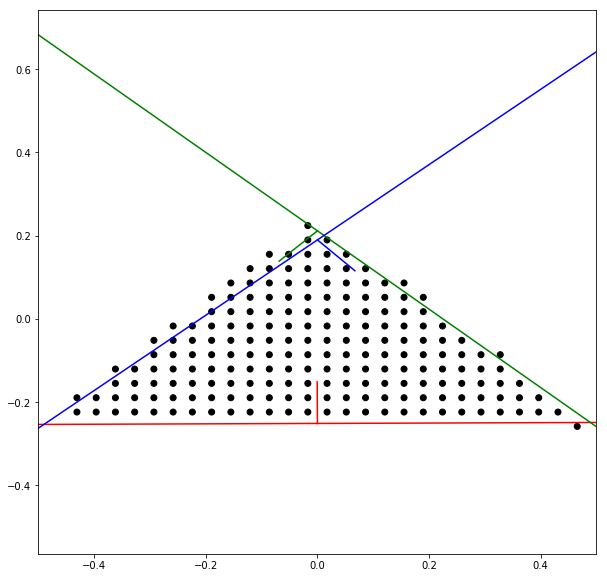

probability of choosing r is 0.497
probability of choosing g is 0.254
probability of choosing b is 0.249
p(y=-1|z="r") is 0.5487805008888245
p(y=-1|z="g") is 0.9573643207550049
p(y=-1|z="b") is 0.9879999756813049


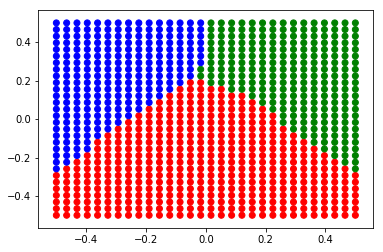

inf gradient switchNet
inf gradient switchNet
80.10% (1m 26s) 0.0000


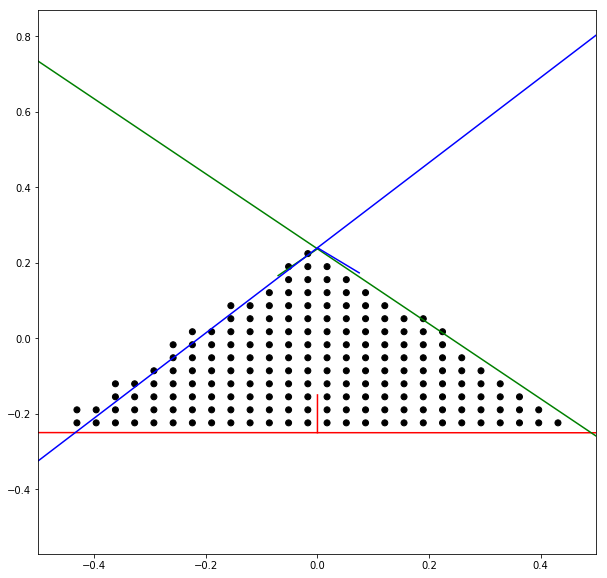

probability of choosing r is 0.491
probability of choosing g is 0.26
probability of choosing b is 0.249
p(y=-1|z="r") is 0.5532786846160889
p(y=-1|z="g") is 0.9465649127960205
p(y=-1|z="b") is 0.984000027179718


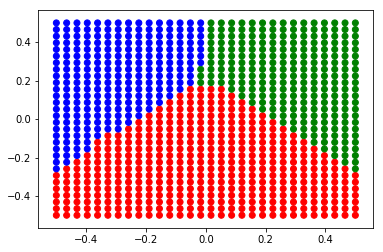

90.10% (1m 35s) 0.0000


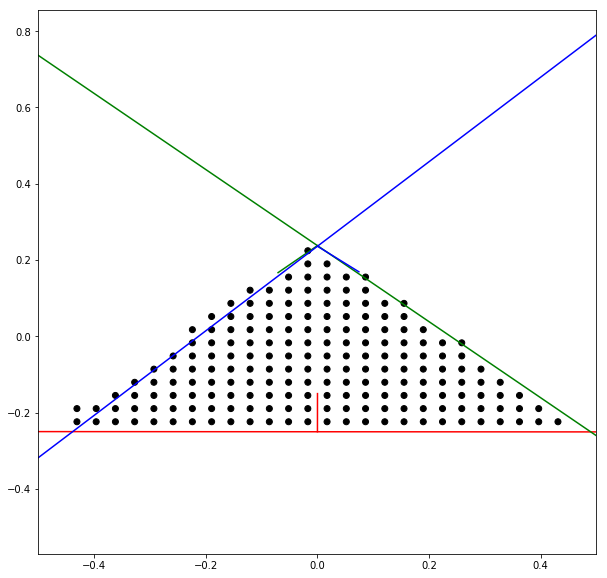

probability of choosing r is 0.493
probability of choosing g is 0.257
probability of choosing b is 0.25
p(y=-1|z="r") is 0.5498981475830078
p(y=-1|z="g") is 0.9573643207550049
p(y=-1|z="b") is 0.9840637445449829


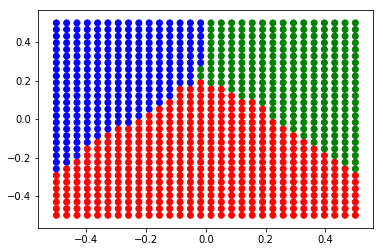

[0.0007090322971343994,
 0.0005358130931854248,
 0.000534122109413147,
 0.00026423525810241697,
 9.139439463615417e-05,
 7.148254662752152e-05,
 4.006607830524445e-05,
 3.6700248718261716e-05,
 3.7296857684850696e-05,
 3.34453359246254e-05]

In [3]:
input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

max_grad = 0.1
log_name = 'triangle_gradient_clip'
t =  InterpretableTrainer(switch, weight, apply_linear, alpha=-0.5, beta=0.7, 
                          log_name=log_name, max_grad=max_grad)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=n, shuffle=True)

t.fit(data, n_epochs=1000, print_every=100)

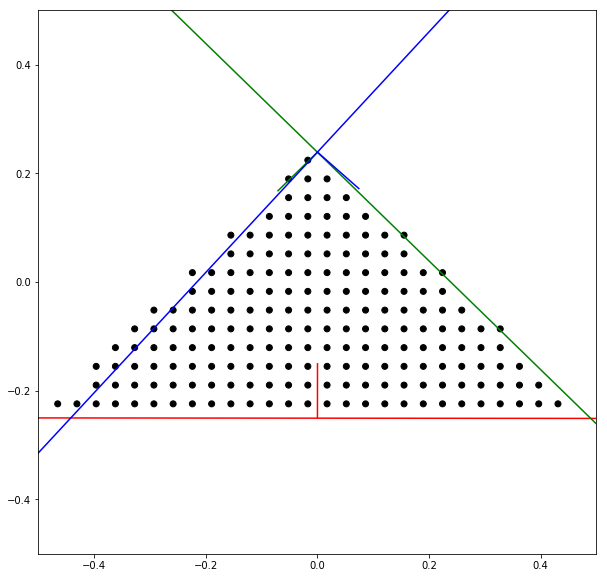

probability of choosing r is 0.493
probability of choosing g is 0.257
probability of choosing b is 0.25
p(y=-1|z="r") is 0.5478615164756775
p(y=-1|z="g") is 0.961240291595459
p(y=-1|z="b") is 0.9840637445449829


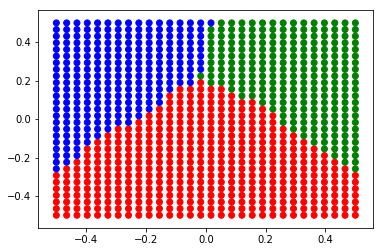

In [4]:
t.plot(to_var(x.data), to_var(y.data), inrange=True)

## egg world

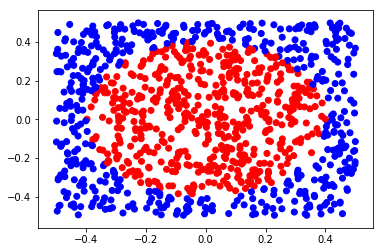

In [5]:
def build_circle(n=10):  
    X = np.random.rand(n, 2)-0.5
    y = (X[:,0]**2 + X[:, 1]**2 <= 0.16)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_circle(n)
plotData(X, Y)

0.12% (0m 0s) 0.0007


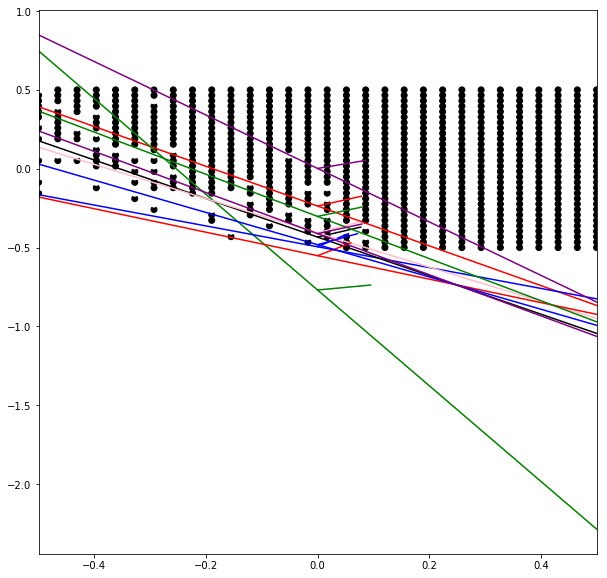

probability of choosing r is 0.0
probability of choosing g is 0.0
probability of choosing b is 0.836
probability of choosing purple is 0.0
probability of choosing k is 0.0
probability of choosing pink is 0.0
probability of choosing r is 0.0
probability of choosing g is 0.164
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.4141414165496826
p(y=-1|z="g") is 0.46464645862579346
p(y=-1|z="b") is 0.5130434632301331
p(y=-1|z="purple") is 0.5287356376647949
p(y=-1|z="k") is 0.46315789222717285
p(y=-1|z="pink") is 0.43421053886413574
p(y=-1|z="r") is 0.5161290168762207
p(y=-1|z="g") is 0.45045045018196106
p(y=-1|z="b") is 0.5600000023841858
p(y=-1|z="purple") is 0.5199999809265137


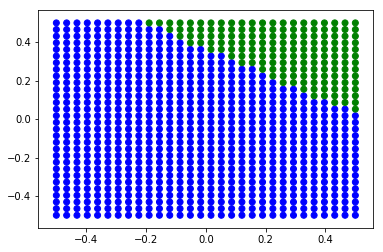

12.62% (0m 17s) 0.0004


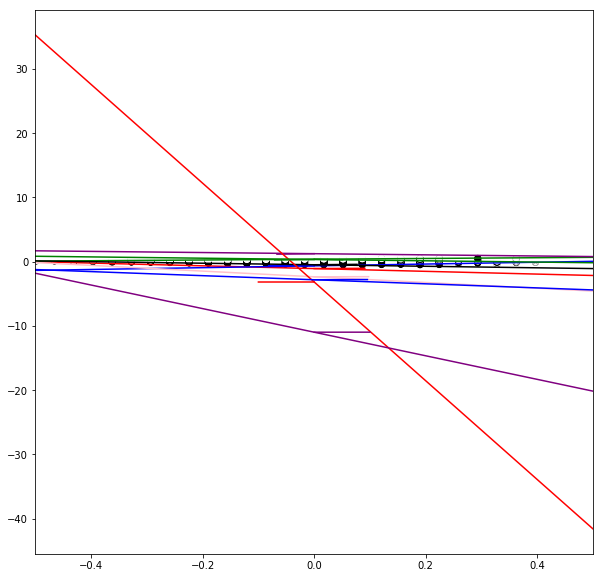

probability of choosing r is 0.0
probability of choosing g is 0.382
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.408
probability of choosing pink is 0.0
probability of choosing r is 0.106
probability of choosing g is 0.104
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.41624364256858826
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.3834586441516876
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.8556700944900513
p(y=-1|z="g") is 0.800000011920929
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


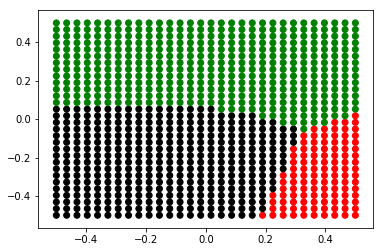

25.12% (0m 33s) 0.0002


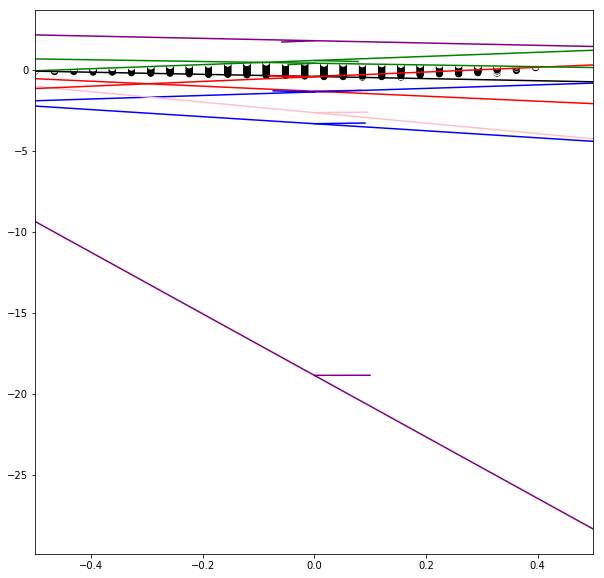

probability of choosing r is 0.0
probability of choosing g is 0.352
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.381
probability of choosing pink is 0.0
probability of choosing r is 0.122
probability of choosing g is 0.145
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.38352271914482117
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.34139785170555115
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.8976377844810486
p(y=-1|z="g") is 0.7516778707504272
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


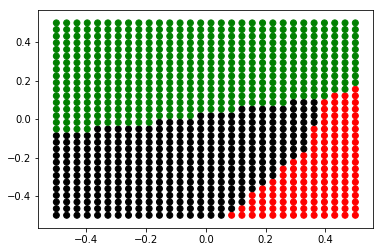

37.62% (0m 50s) 0.0002


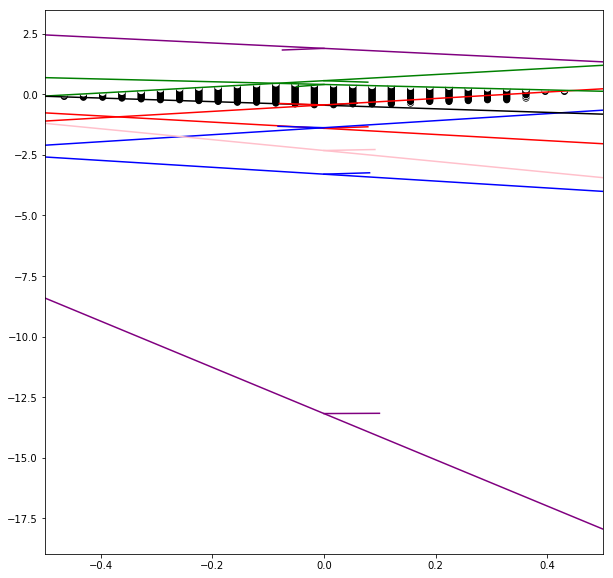

probability of choosing r is 0.0
probability of choosing g is 0.398
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.346
probability of choosing pink is 0.0
probability of choosing r is 0.125
probability of choosing g is 0.131
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.35353535413742065
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.3343023359775543
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.9379844665527344
p(y=-1|z="g") is 0.8549618124961853
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


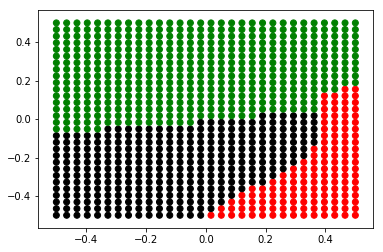

50.12% (1m 6s) 0.0001


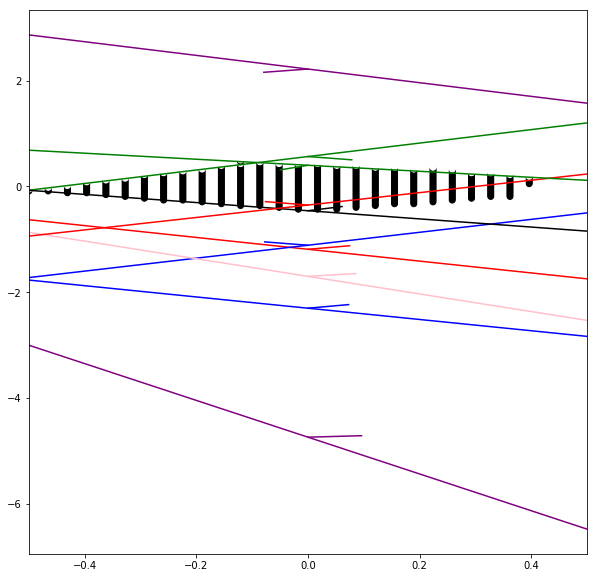

probability of choosing r is 0.0
probability of choosing g is 0.414
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.332
probability of choosing pink is 0.0
probability of choosing r is 0.13
probability of choosing g is 0.124
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.3365384638309479
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.33832335472106934
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.960629940032959
p(y=-1|z="g") is 0.9186992049217224
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


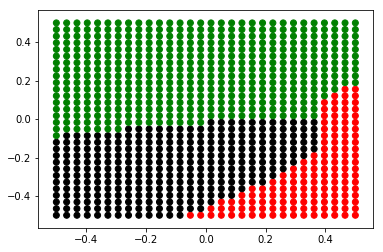

62.62% (1m 24s) 0.0001


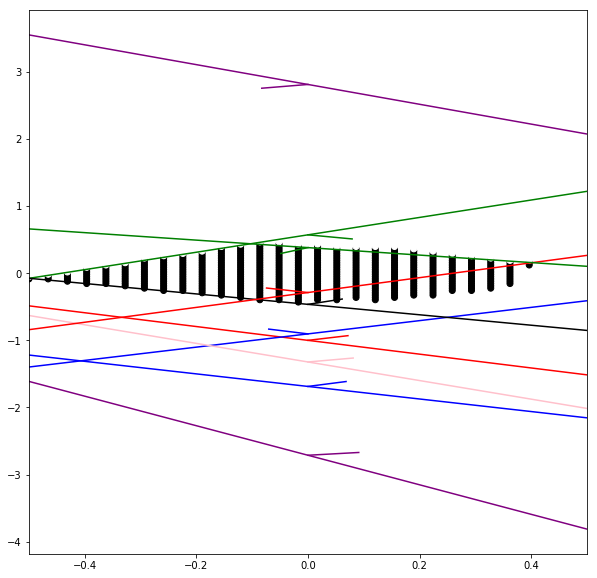

probability of choosing r is 0.0
probability of choosing g is 0.445
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.313
probability of choosing pink is 0.0
probability of choosing r is 0.126
probability of choosing g is 0.116
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.3248259723186493
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.34567901492118835
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.9841269850730896
p(y=-1|z="g") is 0.9411764740943909
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


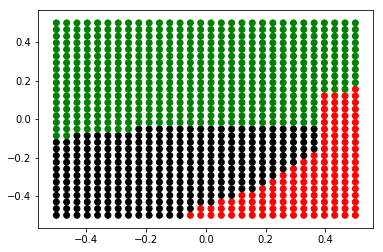

75.12% (1m 41s) 0.0001


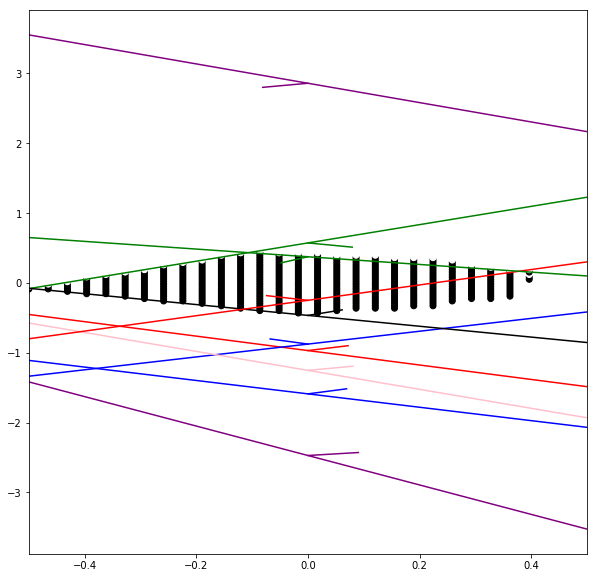

probability of choosing r is 0.0
probability of choosing g is 0.44
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.317
probability of choosing pink is 0.0
probability of choosing r is 0.126
probability of choosing g is 0.117
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.3154362440109253
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.35483869910240173
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 1.0
p(y=-1|z="g") is 0.9491525292396545
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


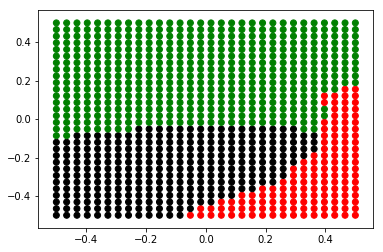

87.62% (1m 59s) 0.0001


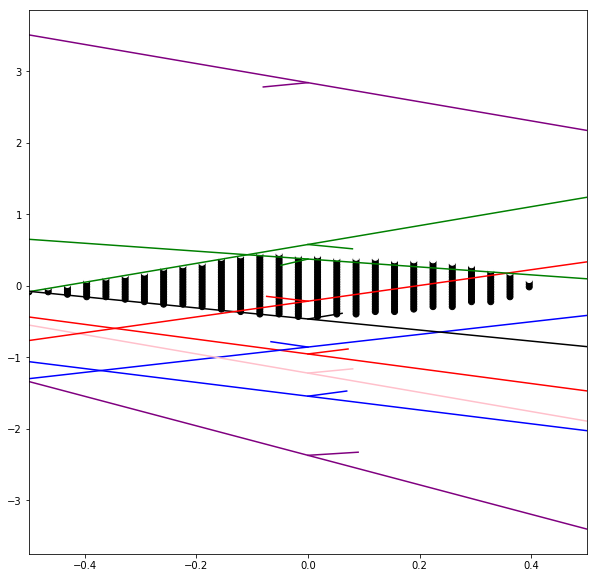

probability of choosing r is 0.0
probability of choosing g is 0.442
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.317
probability of choosing pink is 0.0
probability of choosing r is 0.126
probability of choosing g is 0.115
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.31880733370780945
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.3510971665382385
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.9920634627342224
p(y=-1|z="g") is 0.9411764740943909
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


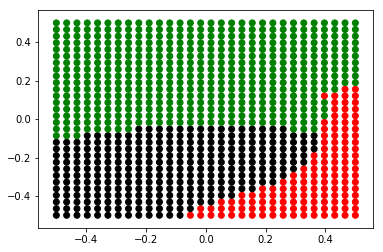

[0.0006930789351463318,
 0.00041377413272857666,
 0.0001958497315645218,
 0.0001723397821187973,
 0.00014813365042209625,
 0.00012920935451984407,
 0.00013357034325599672,
 0.00011174368858337403]

In [6]:
input_size = 2 # 2d input
switch_size = 10 # can only output switch_size lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

t =  InterpretableTrainer(switch, weight, apply_linear, alpha=0, beta=0.6,
                         log_name='circle_gradient_clip')

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=1000, shuffle=True)
t.fit(data, n_epochs=800, print_every=100)

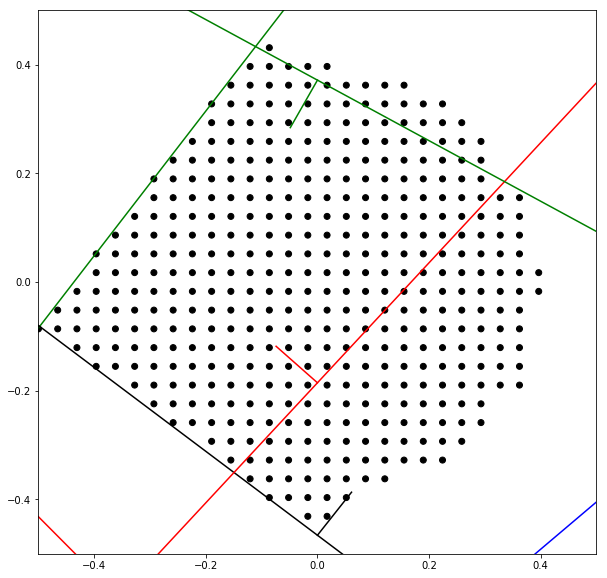

probability of choosing r is 0.0
probability of choosing g is 0.44
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.321
probability of choosing pink is 0.0
probability of choosing r is 0.125
probability of choosing g is 0.114
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.32054176926612854
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.34700316190719604
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.9921259880065918
p(y=-1|z="g") is 0.9734513163566589
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


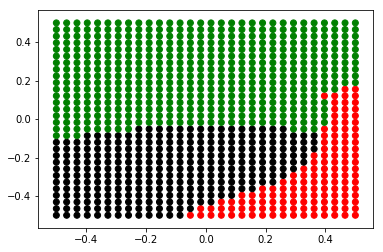

In [7]:
t.plot(to_var(x.data), to_var(y.data), inrange=True)